In [ ]:
!pip install opencv-python-headless

1. Podstawowa wizualizacja kanałów RGB


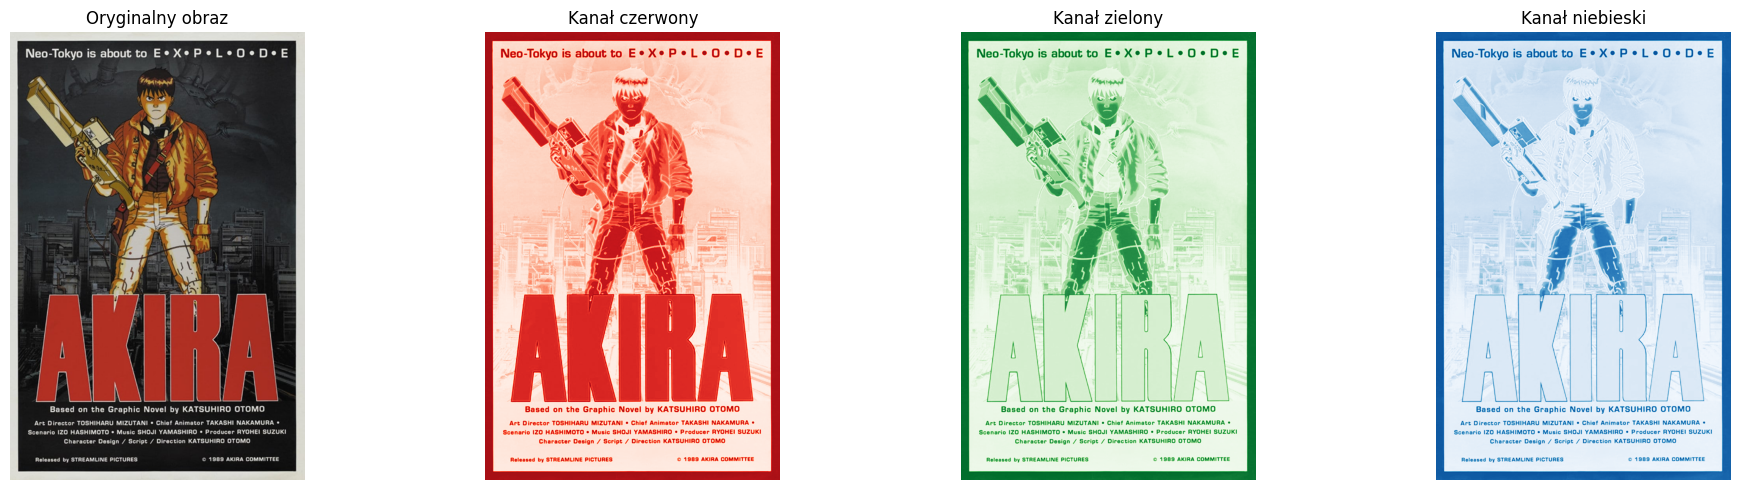


2. Porównanie różnych map kolorów dla każdego kanału


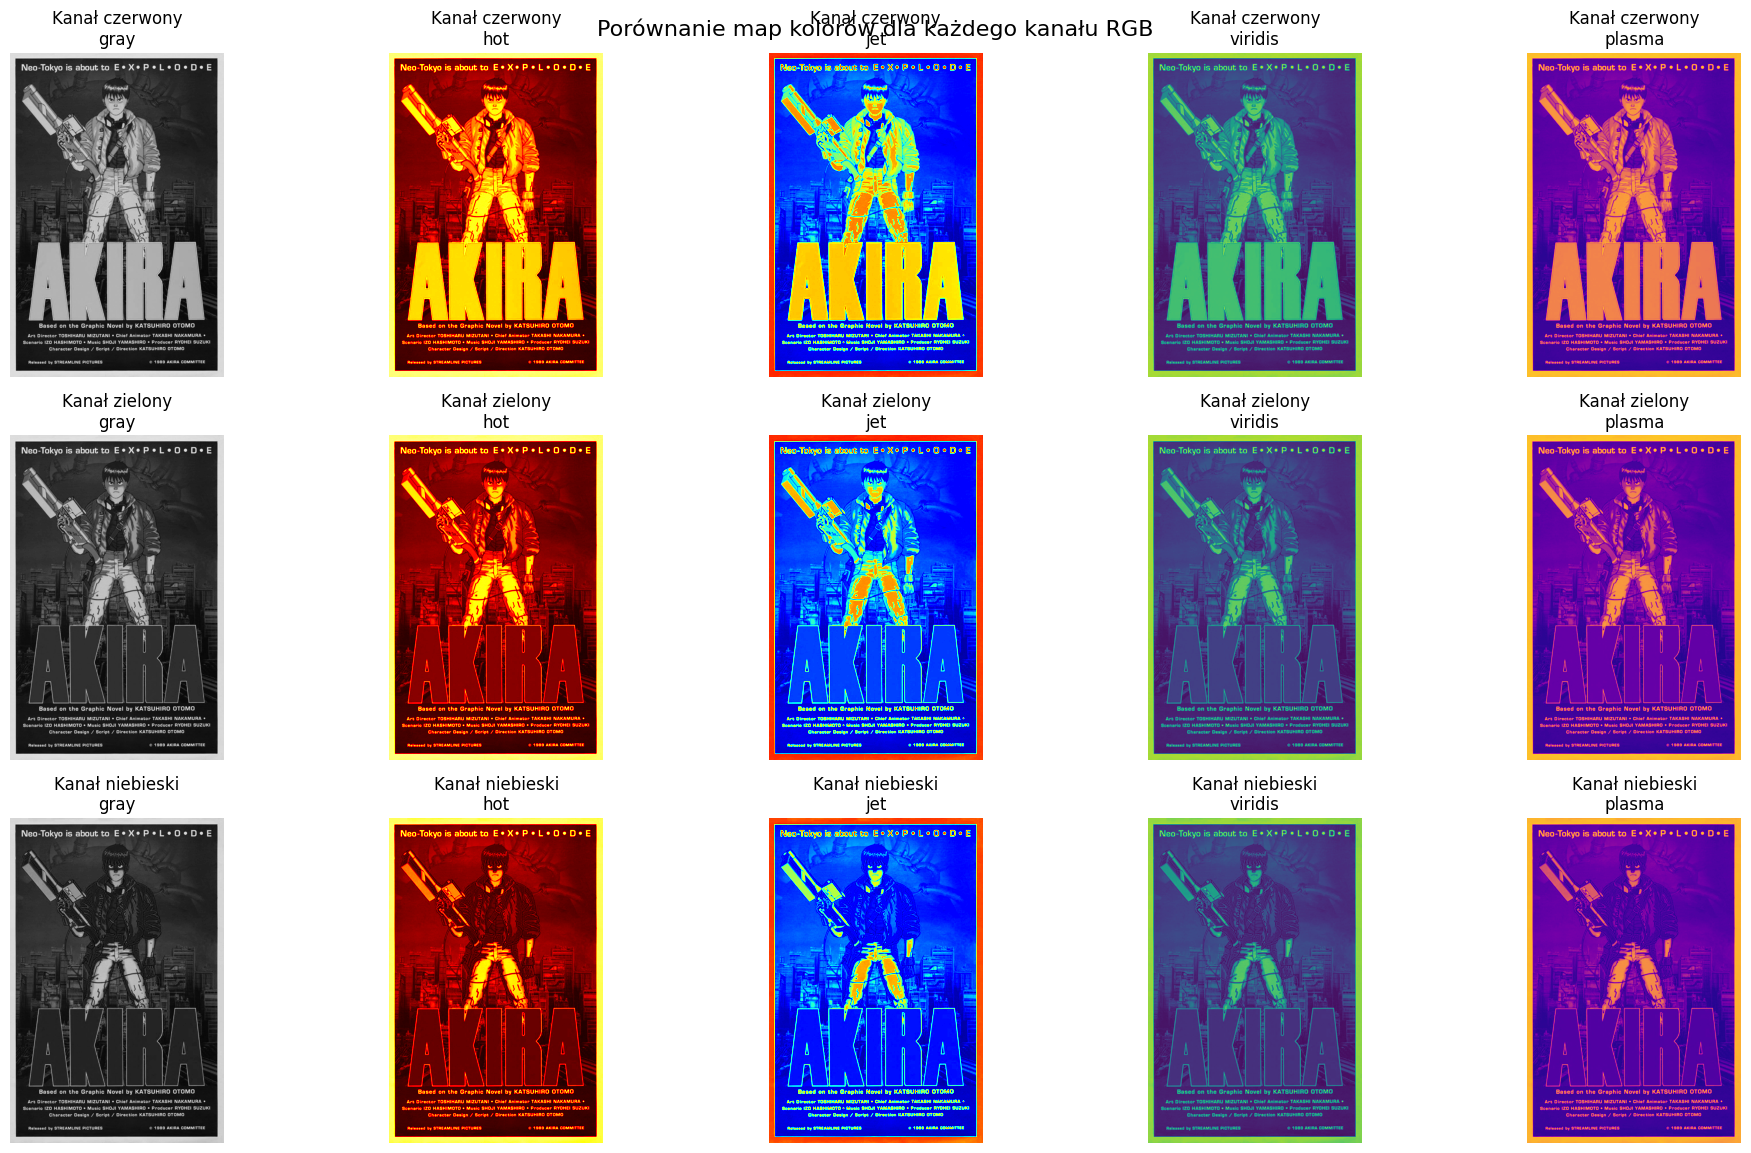


3. Szczegółowe wyjaśnienie wizualizacji pojedynczego kanału


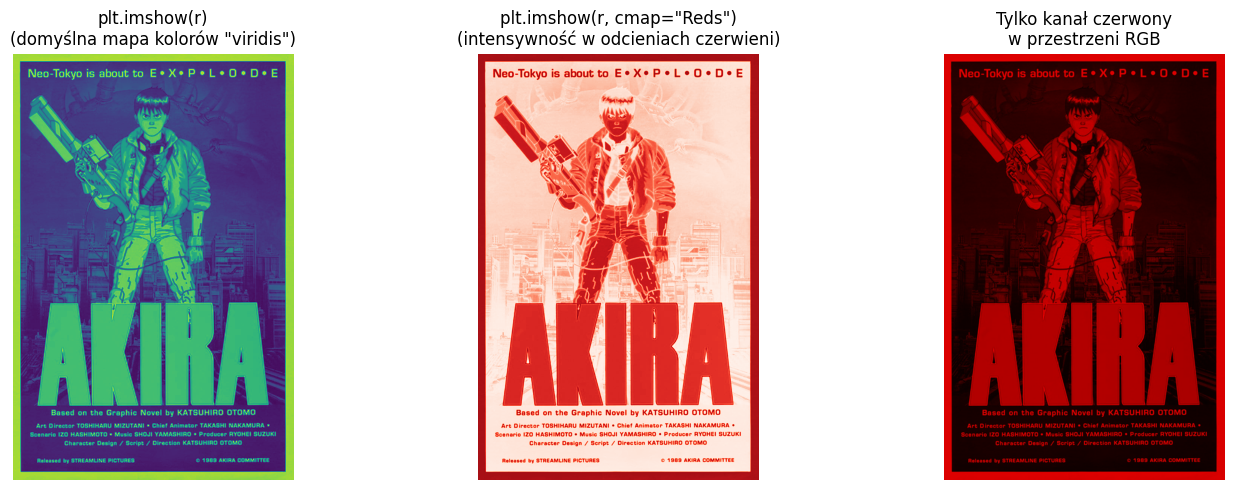


Przykładowe wartości pikseli z kanału czerwonego:
Minimum: 0
Maksimum: 255

Przykładowy fragment tablicy (5x5 pikseli):
[[220 220 220 220 220]
 [220 220 220 220 220]
 [220 220 220 220 220]
 [220 220 220 220 220]
 [220 220 220 220 220]]


In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import os

def download_image(image_link: str) -> str:
    """
    Pobiera obraz z podanego linku i zapisuje lokalnie.

    Args:
        image_link (str): URL obrazu do pobrania

    Returns:
        str: Ścieżka do zapisanego lokalnie pliku
    """
    response = requests.get(image_link)
    local_filename = "downloaded_image.jpg"
    with open(local_filename, "wb") as f:
        f.write(response.content)
    return local_filename

def display_channels_basic(image_path: str):
    """
    Wyświetla oryginalny obraz i jego kanały RGB z podstawowymi mapami kolorów.

    Args:
        image_path (str): Ścieżka do pliku obrazu
    """
    # Wczytaj obraz i przekonwertuj na RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Rozdziel kanały
    r = image[:,:,0]  # kanał czerwony
    g = image[:,:,1]  # kanał zielony
    b = image[:,:,2]  # kanał niebieski

    # Przygotuj obszar wyświetlania
    plt.figure(figsize=(20, 5))

    # Wyświetl oryginalny obraz
    plt.subplot(141)
    plt.imshow(image)
    plt.title("Oryginalny obraz")
    plt.axis('off')

    # Wyświetl kanał czerwony
    plt.subplot(142)
    plt.imshow(r, cmap='Reds')
    plt.title("Kanał czerwony")
    plt.axis('off')

    # Wyświetl kanał zielony
    plt.subplot(143)
    plt.imshow(g, cmap='Greens')
    plt.title("Kanał zielony")
    plt.axis('off')

    # Wyświetl kanał niebieski
    plt.subplot(144)
    plt.imshow(b, cmap='Blues')
    plt.title("Kanał niebieski")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def display_channels_comparison(image_path: str):
    """
    Wyświetla każdy kanał RGB z różnymi mapami kolorów dla porównania.

    Args:
        image_path (str): Ścieżka do pliku obrazu
    """
    # Wczytaj obraz i przekonwertuj na RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Rozdziel kanały
    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]

    # Zdefiniuj mapy kolorów do porównania
    colormaps = ['gray', 'hot', 'jet', 'viridis', 'plasma']

    # Utwórz figurę
    plt.figure(figsize=(20, 12))

    # Wyświetl kanał czerwony z różnymi mapami kolorów
    for idx, cmap in enumerate(colormaps, 1):
        plt.subplot(3, len(colormaps), idx)
        plt.imshow(r, cmap=cmap)
        plt.title(f'Kanał czerwony\n{cmap}')
        plt.axis('off')

    # Wyświetl kanał zielony z różnymi mapami kolorów
    for idx, cmap in enumerate(colormaps, 1):
        plt.subplot(3, len(colormaps), len(colormaps) + idx)
        plt.imshow(g, cmap=cmap)
        plt.title(f'Kanał zielony\n{cmap}')
        plt.axis('off')

    # Wyświetl kanał niebieski z różnymi mapami kolorów
    for idx, cmap in enumerate(colormaps, 1):
        plt.subplot(3, len(colormaps), 2*len(colormaps) + idx)
        plt.imshow(b, cmap=cmap)
        plt.title(f'Kanał niebieski\n{cmap}')
        plt.axis('off')

    plt.suptitle('Porównanie map kolorów dla każdego kanału RGB', fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()

def display_channel_explanation(image_path: str):
    """
    Wyświetla przykład różnych sposobów wizualizacji pojedynczego kanału.

    Args:
        image_path (str): Ścieżka do pliku obrazu
    """
    # Wczytaj obraz i przekonwertuj na RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Wyodrębnij kanał czerwony
    r = image[:,:,0]

    plt.figure(figsize=(15, 5))

    # Bez określonej mapy kolorów
    plt.subplot(131)
    plt.imshow(r)
    plt.title('plt.imshow(r)\n(domyślna mapa kolorów "viridis")')
    plt.axis('off')

    # Z mapą kolorów 'Reds'
    plt.subplot(132)
    plt.imshow(r, cmap='Reds')
    plt.title('plt.imshow(r, cmap="Reds")\n(intensywność w odcieniach czerwieni)')
    plt.axis('off')

    # Oryginalny kanał czerwony w RGB
    rgb_r = np.zeros_like(image)
    rgb_r[:,:,0] = r
    plt.subplot(133)
    plt.imshow(rgb_r)
    plt.title('Tylko kanał czerwony\nw przestrzeni RGB')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Wyświetl informacje o wartościach pikseli
    print("\nPrzykładowe wartości pikseli z kanału czerwonego:")
    print(f"Minimum: {r.min()}")
    print(f"Maksimum: {r.max()}")
    print(f"\nPrzykładowy fragment tablicy (5x5 pikseli):")
    print(r[0:5, 0:5])

def main():
    """
    Główna funkcja wykonująca wszystkie analizy.
    """
    # Link do przykładowego obrazu
    image_link = "https://i.etsystatic.com/16952472/r/il/bf0677/1530154159/il_fullxfull.1530154159_97sx.jpg"

    # Pobierz obraz
    image_path = download_image(image_link)

    # Wykonaj wszystkie analizy
    print("1. Podstawowa wizualizacja kanałów RGB")
    display_channels_basic(image_path)

    print("\n2. Porównanie różnych map kolorów dla każdego kanału")
    display_channels_comparison(image_path)

    print("\n3. Szczegółowe wyjaśnienie wizualizacji pojedynczego kanału")
    display_channel_explanation(image_path)

if __name__ == "__main__":
    main()

In [62]:
# Helper functions, just execute and ignore
image_link = "https://i.etsystatic.com/16952472/r/il/bf0677/1530154159/il_fullxfull.1530154159_97sx.jpg"


def download_image(image_link: str) -> str:
    # Download the image and save it locally as a .jpg file
    response = requests.get(image_link)
    local_filename = "downloaded_image.jpg"
    with open(local_filename, "wb") as f:
        f.write(response.content)
    return local_filename

In [64]:



def read_and_convert_image(image_path: str) -> np.ndarray:
    """
    Read image and convert to grayscale.

    Args:
        image_path (str): Path to the input image.

    Returns:
        np.ndarray: Grayscale image
    """
    # Read the image
    image = cv2.imread(image_path)

    # Convert to grayscale if the image is color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image

In [66]:

def pad_image(image: np.ndarray, kernel_size: int) -> np.ndarray:
    """
    Pad the image to handle border pixels.

    Args:
        image (np.ndarray): Input grayscale image
        kernel_size (int): Size of the kernel (assuming square kernel)

    Returns:
        np.ndarray: Padded image
    """
    pad_width = kernel_size // 2
    padded_image = np.pad(image, pad_width=pad_width, mode='constant', constant_values=0)
    return padded_image

In [67]:

def apply_convolution(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Apply convolution operation to the image.

    Args:
        image (np.ndarray): Input padded image
        kernel (np.ndarray): Convolution kernel

    Returns:
        np.ndarray: Result after convolution
    """
    height, width = image.shape[0]-2, image.shape[1]-2  # original image dimensions
    output = np.zeros((height, width), dtype=np.float32)

    for y in range(height):
        for x in range(width):
            region = image[y:y+3, x:x+3].astype(np.float32)
            result = np.sum(region * kernel)
            output[y, x] = np.clip(result, 0, 255)

    return output

In [68]:

def exercise_1(image_path: str, kernel: np.ndarray) -> np.ndarray:
    """
    Complete implementation combining all steps.

    Args:
        image_path (str): Path to the input image
        kernel (np.ndarray): Convolution kernel

    Returns:
        np.ndarray: Filtered image
    """
    # Step 1: Read and convert image
    image = read_and_convert_image(image_path)

    # Step 2: Pad image
    padded_image = pad_image(image, kernel_size=3)

    # Step 3: Apply convolution
    filtered_image = apply_convolution(padded_image, kernel)

    # Step 4: Convert to uint8
    output = filtered_image.astype(np.uint8)

    return output

# Test the implementation
def test_implementation(image_path: str, kernel: np.ndarray):
    """
    Test function to compare results with OpenCV implementation.
    """
    # Our implementation
    result1 = exercise_1(image_path, kernel)

    # OpenCV implementation
    result2 = apply_custom_kernel(image_path, kernel)

    # Compare results
    diff = np.abs(result1 - result2)
    print("Maximum difference:", np.max(diff))
    print("Average difference:", np.mean(diff))

    # Display results
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(result1, cmap='gray')
    plt.title('Our Implementation')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(result2, cmap='gray')
    plt.title('OpenCV')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(diff, cmap='hot')
    plt.title('Difference')
    plt.colorbar()
    plt.axis('off')
    plt.show()

    return result1, result2

In [65]:
read_and_convert_image(download_image(image_link))

array([[220, 220, 220, ..., 219, 220, 221],
       [220, 220, 220, ..., 218, 220, 221],
       [220, 220, 220, ..., 218, 219, 220],
       ...,
       [220, 220, 219, ..., 215, 215, 215],
       [220, 220, 219, ..., 215, 215, 215],
       [220, 220, 219, ..., 215, 215, 215]], dtype=uint8)

Maximum difference: 255
Average difference: 1.1205958443078725


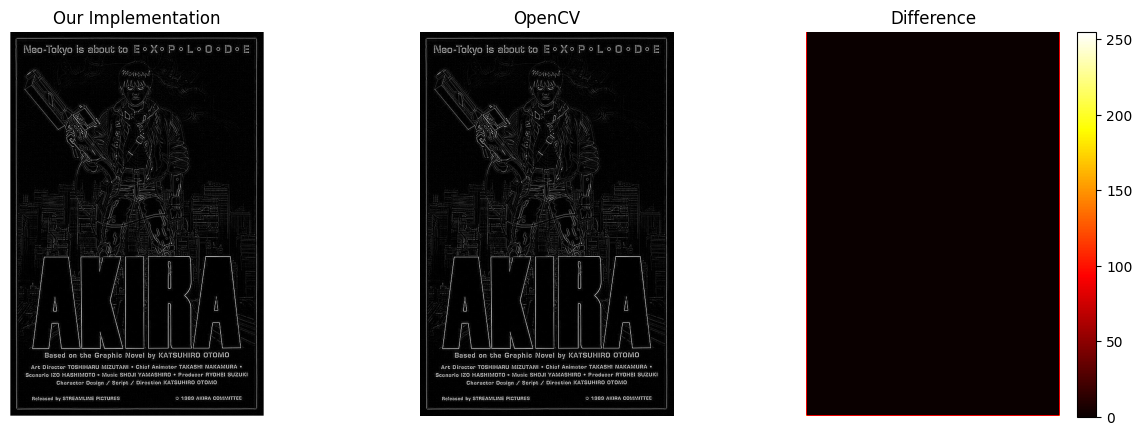

In [69]:
# Test implementation
image_path = download_image(image_link)
result1, result2 = test_implementation(image_path, kernel)